In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mplot
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

from matplotlib.colors import ListedColormap
import os
import subprocess
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,  precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#from sklearn.preprocessing import StandardScaler
 
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

import random
   
import csv
import openpyxl




from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


import tensorflow as tf
import keras

from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist 
 
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.backend import clear_session





import pickle 

from shap import TreeExplainer, Explanation
from shap.plots import waterfall
import shap


import lime 
from lime import lime_tabular
import random

import dalex as dx 

from tabulate import tabulate 
 
# Define custom metrics
recall = Recall()
precision = Precision() 
auc = AUC()


print("NumPy Version: {}".format(np.__version__))
print("Pandas Version: {}".format(pd.__version__))
print("ScienceKit Learn Version: {}".format(sklearn.__version__))
print("TensorFlow Version: {}".format(tf.__version__))
print("Keras Version: {}".format(keras.__version__))
print("XAI SHAP Version: {}".format(shap.__version__))




c:\Users\Mubashir Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\Mubashir Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-usin

NumPy Version: 1.26.4
Pandas Version: 2.1.2
ScienceKit Learn Version: 1.3.2
TensorFlow Version: 2.10.1
Keras Version: 2.10.0
XAI SHAP Version: 0.39.0


In [2]:
dataSetIndex = 6
needToMakePictureOfTrees = 0
''' ---------------------------------------------------------- '''
dataSetFilePath = ""
dataSetName = ""
dataSetResultDirectory = "./"

if(dataSetIndex == 0):
    dataSetFilePath = "./heartDisease/0_statLog_dataSet.csv"
    dataSetName = "SateLog_DataSet"
elif (dataSetIndex == 1):
    dataSetFilePath = "./heartDisease/1_heart_statlog_cleveland_hungary_final.csv"
    dataSetName = "ALL_StateLog_CleveLand_Hungary"
elif (dataSetIndex == 2):
    dataSetFilePath = "./heartDisease/2_cleveland.csv"
    dataSetName = "Cleveland"
elif (dataSetIndex == 3):
    dataSetFilePath = "./heartDisease/3_framingham.csv"
    dataSetName = "framingham"
elif (dataSetIndex == 4):
    dataSetFilePath = "./heartDisease/4_CardiacPrediction.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 5):
    dataSetFilePath = "./heartDisease/5_CardiacPredictionLessDimensions.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 6):
    dataSetFilePath = "./heartDisease/6_CardiacPredictionFewDimensions.xlsx"
    dataSetName = "CardiacPrediction"
else:
    dataSetFilePath = ""
    dataSetName = ""

if(dataSetIndex==4 or dataSetIndex==5 or dataSetIndex==6):
    #fileData = pd.read_excel(dataSetFilePath, sheet_name='CoroHeartDis')
    fileData = pd.read_excel(dataSetFilePath)
else:
    fileData = pd.read_csv(dataSetFilePath)

print("Shape of fileData: {}".format(fileData.shape))
print("Column Headings: {}".format(fileData.__dataframe__().column_names()))
print("Number of Records: {}".format(fileData.__dataframe__().num_rows()))


missingValues = fileData.isnull().any().sum()
print(f"\nNumber of Missing Values: {missingValues}")

num_rows_before = fileData.shape[0]
# Remove duplicate records based on all columns
fileData.drop_duplicates(inplace=True)
# Check the number of rows after removing duplicates
num_rows_after = fileData.shape[0]
# Print the number of duplicate records removed
num_duplicates_removed = num_rows_before - num_rows_after
print(f"Number of duplicate records removed: {num_duplicates_removed}")
 
 # Preprocess Steps from the ChatGPT
# 1. Handling Missing Values:
fileData = fileData.dropna()
print("Shape of fileData: {}".format(fileData.shape))              
#fileData.replace({'?': np.nan}).dropna().astype(float)
#fileData = fileData.fillna(0) 

fileData = fileData.fillna(0) 

print("Shape of fileData End: {}".format(fileData.shape))

finalResultTable = [ ['Index', 'Method', 'Accuracy %','Recall %','Precision %','F1 Score','AUC'], ]  


X = fileData.drop(fileData.__dataframe__().column_names()[-1], axis=1)  # Features
X = X.drop('Gender', axis=1)  # Features
#cols = ['Gender', 'Age','Annual-Family-Income', 'Cholesterol', 'Diabetes', 'Triglycerides', 'Red-Cell-Distribution-Width', 'X60-sec-pulse', 'Height', 'Albumin', 'Blood-Rel-Stroke', 'Blood-Rel-Diabetes', 'HDL', 'Moderate-work','Iron', 'Hemoglobin','Protein', 'SEQN'   ] 
#cols = ['Age','Gender','Blood-Rel-Stroke','Triglycerides','Blood-Rel-Diabetes','Cholesterol','Platelet-count','Diabetes','Albumin','Hemoglobin','Moderate-work','Diastolic','Protein','Height','X60-sec-pulse','White-Blood-Cells','Bilirubin','Hematocrit','HDL','Systolic' ] 
#X = fileData[cols]

Y = fileData[fileData.__dataframe__().column_names()[-1]]  # Labels

columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())

print("\n")
print("columns of x:: {} \n\n and features of X: {}".format(len(X.columns), X.columns))

dataSetResultDirectory = "./"
dataSetResultDirectory += ("DatasetResults_MLP_SMOTE_29April_24")
dataSetResultDirectory += "/"
if not os.path.isdir(dataSetResultDirectory):
    os.makedirs(dataSetResultDirectory)

dataSetName += "_{}".format(fileData.shape)



Shape of fileData: (37079, 40)
Column Headings: Index(['Gender', 'Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight',
       'Height', 'Body-Mass-Index', 'White-Blood-Cells', 'Lymphocyte',
       'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Platelet-count', 'Segmented-Neutrophils', 'Hematocrit', 'Albumin',
       'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'Iron',
       'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Moderate-work', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke',
       'CoronaryHeartDisease'],
      dtype='object')
Number of Records: 37079

Number of Missing Values: 0
Number of duplicate records removed: 0
Shape of fileData: (37079, 40)
Shape of fileData End: (37079, 40)


columns of x:: 38 

 and features of X: Index(['Age', 'X60-sec-pulse', 'Systolic', 'Diastolic', 'Weight', 'Height',
       'Body-Mass-Index', 'Wh

In [3]:
print("Shape of fileData: {} , target Len:{}".format(fileData.shape, len(Y)))
print("X: {} , Y:{}".format(X.shape, Y.shape))
#print("\n\nX: head:: \n{}".format(X.head()))
#print("\n\nY: head::\n {}".format(Y.head()))



rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
ada = ADASYN(sampling_strategy='auto', random_state=42)
  
# Oversample the minority class using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, Y)  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)
 
print("Target Column Name:: {} \n".format(fileData.__dataframe__().column_names()[-1]))
print("\n X Train: Shape:: {}".format(X_train.shape))
print(" X Test: Shape:: {}".format(X_test.shape))  
 
positiveClass =  0
negativeClass = 0
for i in y_train:
    if(i == 0):
        negativeClass += 1
    if(i == 1):
        positiveClass += 1
print("Train DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Train DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Train DataSet Total Records:: {}".format(positiveClass + negativeClass)) 

print("\n\n") 

positiveClass =  0
negativeClass = 0
for i in y_test:
    if(i == 0):
        negativeClass += 1
    if(i == 1):
        positiveClass += 1
print("Test DataSet Positive Class Records:: {}".format(positiveClass)) 
print("Test DataSet Negative Class Records:: {}".format(negativeClass)) 
print("Test DataSet Total Records:: {}".format(positiveClass + negativeClass)) 



Shape of fileData: (37079, 40) , target Len:37079
X: (37079, 38) , Y:(37079,)


Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "c:\Users\Mubashir Iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Target Column Name:: CoronaryHeartDisease 


 X Train: Shape:: (56913, 38)
 X Test: Shape:: (14229, 38)
Train DataSet Positive Class Records:: 28457
Train DataSet Negative Class Records:: 28456
Train DataSet Total Records:: 56913



Test DataSet Positive Class Records:: 7114
Test DataSet Negative Class Records:: 7115
Test DataSet Total Records:: 14229


In [4]:
columnsForGraph = []
columnsForGraph.clear()
tableDataRow = []


# Concatenate feature and target data for both training and testing sets
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

columns = df_combined.__dataframe__().column_names() 
totalRecords = (df_combined.__dataframe__().num_rows())
for column in columns:
    singleColumnCount = df_combined[column].value_counts()
    if(len(singleColumnCount) < 3):
        #print('Column Name:{} -> total records:{}'.format(column, totalRecords ) )
        #print('Number of classes:', len(singleColumnCount))
        #print('Class distribution:')
        #print(singleColumnCount)
        #print("np Array: {}".format(np.array(singleColumnCount)))
        #print("index: 0: {} -> {} %".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100))
        #print("index: 1: {} -> {} %".format(np.array(singleColumnCount)[1], ( np.array(singleColumnCount)[1] /totalRecords) * 100))  
        #print('---------------------------------------------------------------')
        columnsForGraph.append(column)
 
tableDataRow = [ ['Index', 'Column Name', 'Total Classes','Class A Records','Class B Records'], ]

indexx = 1
for column in columnsForGraph:
    singleColumnCount = df_combined[column].value_counts()
    singleRowInTable = [] 
    singleRowInTable.append(indexx)
    singleRowInTable.append(column)
    singleRowInTable.append(len(singleColumnCount))
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[1], (np.array(singleColumnCount)[1] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    indexx += 1
    tableDataRow.append(singleRowInTable) 

 
# Determine the number of rows in the table (excluding the header)
num_rows = len(tableDataRow) + 1
# Calculate the desired figure size based on the number of rows
fig_width = 6  # Set the desired width of the figure
fig_height = num_rows * 0.5  # Adjust the scaling factor to control the height

fig, ax = mplot.subplots(figsize=(fig_width, fig_height)) 
table = mplot.table(cellText=tableDataRow, loc='center') 

table.auto_set_column_width(col=list(range(len(tableDataRow[0]))))

table.auto_set_font_size(False)
table.set_fontsize(12) 
table.scale(2.0, 2.0) 

dataSetString = "Dataset:  {}, Total Records: {}, No. Features: {}".format(dataSetName, totalRecords, df_combined.__dataframe__().num_columns())
targetStr ="Target Column Name: {} , No of Classes: {}".format(columns[-1], len(df_combined[columns[-1]].value_counts()))
distributionOfTargetClassA ="Class A Records: {} , {:.2f} %".format(np.array(df_combined[columns[-1]].value_counts())[0], (np.array(df_combined[columns[-1]].value_counts())[0] /totalRecords) * 100)
distributionOfTargetClassB ="Class B Records: {} , {:.2f} %".format(np.array(df_combined[columns[-1]].value_counts())[1], (np.array(df_combined[columns[-1]].value_counts())[1] /totalRecords) * 100)

fig.text(-0.1, +0.10,  dataSetString, horizontalalignment='left', wrap=False , fontsize=12 )  
fig.text(-0.1, +0.02,  targetStr, horizontalalignment='left', wrap=False  , fontsize=12 )   
fig.text(-0.1, -0.06,  distributionOfTargetClassA, horizontalalignment='left', wrap=False , fontsize=12  )   
fig.text(-0.1, -0.14,  distributionOfTargetClassB, horizontalalignment='left', wrap=False  , fontsize=12 )   

remarks = "You need to distribute the target class in equal number of records in training-set."
#fig.text(-0.2, -0.15,  remarks, horizontalalignment='left', wrap=True ,fontsize=12, fontweight='bold' )   
 
mplot.axis('off')
mplot.title(f'Exploring Dataset after SMOTE' ,fontsize=16, fontweight='bold') 
picturePath = "{}02.DataSet_analysis_After_dataAugmentation_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.savefig(picturePath,  dpi=300 )
#mplot.show()
mplot.close()

In [5]:
tf.keras.backend.clear_session()
clear_session()
# Train and evaluate the model
epochs = 10
batch_size = 25

history = 0
model = 0
binary_predictions = 0
y_pred = 0
method = "MLP"

# Define the attention layer
print("Number of Node: {}".format(X_train.shape[1]//2))
print("Number 2 of Node: {}".format(X_train.shape[1]//1.5))
 
def optimize_for_gpu(model):
    # Leverage GPU if available
    if tf.config.list_physical_devices('GPU'):
        print("GPU detected, using GPU for training.")
        with tf.device("/GPU:0"):
            model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', Recall(), Precision(), AUC()])  # Add custom metrics
    else:
        print("GPU not detected, using CPU for training.")
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', Recall(), Precision(), AUC()])  # Add custom metrics

def train_evaluate_model(X_train, X_test, y_train, y_test, model, epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    # Evaluate on test set
    loss2, test_acc, test_recall, test_precision, test_auc = model.evaluate(X_test, y_test)
    print("Test Accuracy:", (test_acc*100.0))
    print("Test Recall:", (test_recall*100.0))
    print("Test Precision:", (test_precision*100.0))
    print("Test AUC:", test_auc)        

    # Print classification report (optional)
    y_pred = model.predict(X_test)
    binary_predictions = [1 if prob >= 0.5 else 0 for prob in y_pred]
    # Now, you can use classification_report
    print(classification_report(y_test, binary_predictions))

    return test_acc, test_recall, test_precision,  test_auc, history, binary_predictions


#if __name__ == "__main__":
# Defining Model layers
input_layer = Input(shape=(X_train.shape[1],))
# Traditional neural network part (adjust based on your analysis)
x = layers.Dense(X_train.shape[1] * 2, activation='relu')(input_layer)
x = layers.Dense(X_train.shape[1] * 3, activation='relu')(x)
x = layers.Dense(X_train.shape[1], activation='relu')(x)
x = layers.Dense(X_train.shape[1], activation='relu')(x)
x = layers.Dense(X_train.shape[1], activation='relu')(x)
x = layers.Dense(X_train.shape[1] // 2, activation='relu')(x)
x = layers.Dense(X_train.shape[1] // 4, activation='relu')(x)
# Output layer
output_layer = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

#optimize_for_gpu(model)c
       
with tf.device("/GPU:1"):
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', Recall(), Precision(), AUC()])  # Add custom metrics



test_acc, test_recall, test_precision, test_auc, history, binary_predictions = train_evaluate_model(X_train, X_test, y_train, y_test, model, epochs, batch_size)



Number of Node: 19
Number 2 of Node: 25.0
Epoch 1/10
2277/2277 [==============================] - 39s 16ms/step - loss: 0.4697 - accuracy: 0.7788 - recall: 0.8407 - precision: 0.7480 - auc: 0.8519
Epoch 2/10
2277/2277 [==============================] - 35s 15ms/step - loss: 0.4077 - accuracy: 0.8174 - recall: 0.8680 - precision: 0.7882 - auc: 0.8908
Epoch 3/10
2277/2277 [==============================] - 36s 16ms/step - loss: 0.3742 - accuracy: 0.8365 - recall: 0.8782 - precision: 0.8105 - auc: 0.9092
Epoch 4/10
2277/2277 [==============================] - 34s 15ms/step - loss: 0.3533 - accuracy: 0.8475 - recall: 0.8821 - precision: 0.8250 - auc: 0.9198
Epoch 5/10
2277/2277 [==============================] - 36s 16ms/step - loss: 0.3399 - accuracy: 0.8537 - recall: 0.8882 - precision: 0.8308 - auc: 0.9253
Epoch 6/10
2277/2277 [==============================] - 32s 14ms/step - loss: 0.3305 - accuracy: 0.8587 - recall: 0.8980 - precision: 0.8326 - auc: 0.9292
Epoch 7/10
2277/2277 [======

Final Test Results:
Accuracy: 88.01040053367615
Recall: 91.8189
Precision: 85.3187
AUC Score: 94.5445
MLP Confusion Matrix saved:: path: ./DatasetResults_MLP_SMOTE_29April_24/Model_Evaluation_MLP_CardiacPrediction_(37079, 40)_Epoch_10.png


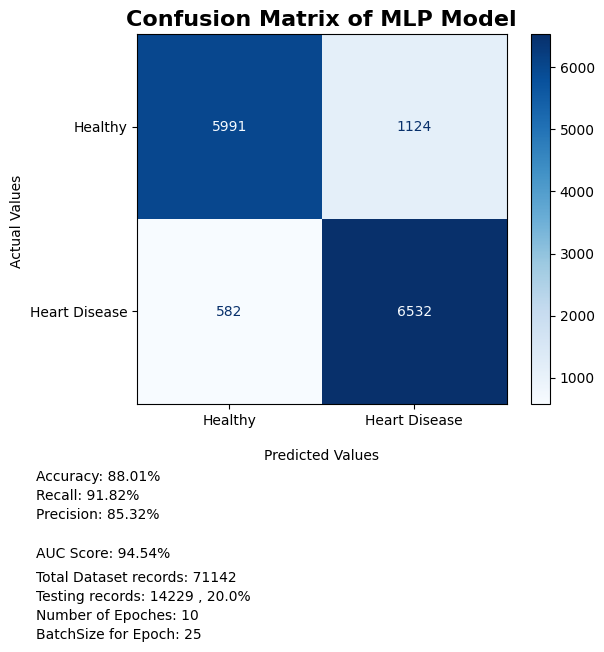

In [6]:
# Print final results and consider saving the model for future use
print("Final Test Results:")
print("Accuracy: {}".format((test_acc*100)))
print(f"Recall: {(test_recall*100):.4f}")
print(f"Precision: {(test_precision*100):.4f}")
print(f"AUC Score: {(test_auc*100):.4f}")  


cm = confusion_matrix(y_test, binary_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Heart Disease'])

display.plot(cmap=plt.cm.Blues, values_format=".4g") 

display.ax_.set_title("Confusion Matrix of {} Model".format(method),fontsize=16, fontweight='bold')
display.ax_.set_xlabel('\nPredicted Values')
display.ax_.set_ylabel('Actual Values ')

accuracyString ="Accuracy: {:.2f}%".format( test_acc*100.0 ) 
recallString =  'Recall: {:.2f}%'.format(test_recall* 100.0)
precisionString = 'Precision: {:.2f}%'.format(test_precision * 100.0)  
featureListString = "AUC Score: {:.2f}%".format(test_auc * 100.0)
totaldataSetString = "Total Dataset records: {}".format((len(X_train)+len(X_test)))
testingdataSetString = "Testing records: {} , {:.1f}%".format(len(X_test), ( ( len(X_test) / (len(X_train)+len(X_test)) )*100.0  ))
numberOfEpochsString = "Number of Epoches: {}".format(epochs)
batchSizeOfTrainingString = "BatchSize for Epoch: {}".format(batch_size)

display.figure_.text(0.010, -0.05,  accuracyString, horizontalalignment='left', wrap=False )  
display.figure_.text(0.010, -0.09,  recallString, horizontalalignment='left', wrap=False )      
display.figure_.text(0.010, -0.13,  precisionString, horizontalalignment='left', wrap=False ) 
#display.figure_.text(0.010, -0.17,  f1String, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.21,  featureListString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.26,  totaldataSetString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.30,  testingdataSetString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.34,  numberOfEpochsString, horizontalalignment='left', wrap=False ) 
display.figure_.text(0.010, -0.38,  batchSizeOfTrainingString, horizontalalignment='left', wrap=False ) 
 
picturePath = "{}Model_Evaluation_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, method, dataSetName, epochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
print("{} Confusion Matrix saved:: path: {}".format(method, picturePath))

mplot.show()
mplot.close()


In [7]:
csvPath = "{}Model_training_accuracy_and_evaluations_{}_{}_Epoch_{}.xlsx".format(dataSetResultDirectory, method, dataSetName, epochs)

# Create a new workbook
wb = openpyxl.Workbook()
ws = wb.active  # Get the active worksheet

str22 = (classification_report(y_test, binary_predictions))
 
str22.strip() 
str22.replace(" ", ",") 
data_lines = str22.splitlines()  # Split by newlines
str22 = str("\n\n\n Training accuracy:\n"  )
data_lines += str22.splitlines()  # Split by newlines
str22 = str(history.history['accuracy'])
str22.strip() 
str22.replace(" ", ",")
str22.replace("[", "")
str22.replace("]", "") 
data_lines += str22.splitlines()  # Split by newlines
 
# Split each line into a list (comma-separated values)
xlsFileData = [line.split(",") for line in data_lines]
# Write the data to the worksheet, starting from row 1
for row_index, row in enumerate(xlsFileData):
    for col_index, value in enumerate(row):
        ws.cell(row=row_index + 1, column=col_index + 1).value = value

# Save the workbook
wb.save(csvPath)

 

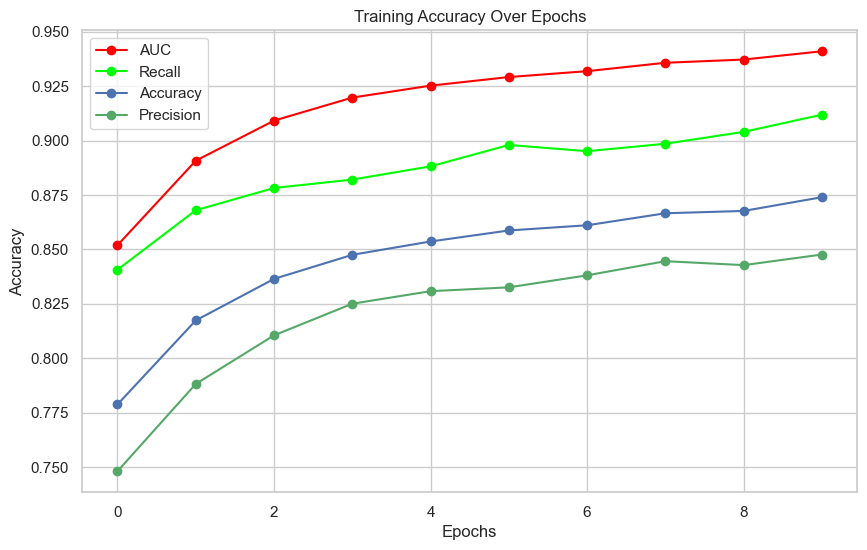

In [20]:
# Plotting training accuracy
numberOfEpochs = epochs
batchSizeOfTraining = batch_size

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['auc'], label='AUC', marker='o', linestyle='-', color='red')
plt.plot(history.history['recall'], label='Recall', marker='o', linestyle='-', color='lime')
plt.plot(history.history['accuracy'], label='Accuracy', marker='o', linestyle='-', color='b')
plt.plot(history.history['precision'], label='Precision', marker='o', linestyle='-', color='g')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
# Add legend
plt.legend()
picturePath = "{}3.Model_training_Accuracy_{}_epoches_{}.png".format(dataSetResultDirectory, dataSetName, numberOfEpochs)
plt.savefig(picturePath,  dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'auc'])


88.01066893524612
[0.         0.15797611 1.        ]
[0.         0.91818949 1.        ]
[inf  1.  0.]


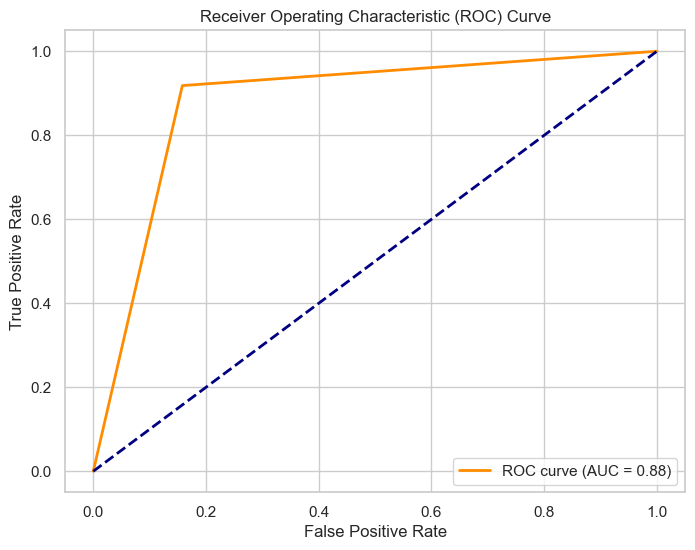

In [15]:
# Calculate AUC
auc_score = roc_auc_score(y_test, binary_predictions)
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test, binary_predictions)

print(auc_score*100.0)
print(fpr)
print(tpr)
print(_)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

picturePath = "{}Model_Evaluation_ROC_{}_{}_Epoch_{}.png".format(dataSetResultDirectory, method, dataSetName, numberOfEpochs)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')

plt.show()
plt.close()


